# 游戏数据分析学习目标
- 知道游戏行业关键数据指标
- 掌握ARPU、ARPPU等指标计算方法


---

# 1、游戏行业有哪些关键性指标？
- 运营数据
    - 激活数据
    - 激活且登陆率应用场景
    - 活跃数据
- 游戏行为数据
- 市场投放数据
- 用户付费指标
- 转换率漏斗


# 2、什么是ARPU？
概念：ARPU(Average Revenue Per User)即每用户平均收入，ARPU注重的是一个时间段内运营商从每个用户处所得到的收入。
计算公式：ARPU = 付费金额 / 活跃人数


# 3、什么是转化率漏斗？
概念：转化率漏斗是一种分析模型，用于衡量用户在完成特定目标（如购买、注册等）的过程中，从一个阶段到下一个阶段的转化效率。它帮助企业了解用户在不同阶段的行为，识别流失点，并优化用户体验以提高转化率

![漏斗转化案例](./img/漏斗转化案例.png)


漏斗分析模型通常包括以下几个步骤：
- 定义漏斗阶段：确定用户从开始到完成目标所需经历的各个阶段。
- 数据收集：收集用户在每个阶段的行为数据。
- 数据分析：分析各阶段的转化率和流失率，找出问题环节。
- 优化措施：根据分析结果，制定改进策略，如改进页面设计、优化用户流程等。

# 3、什么是ARPPU？
概念：ARPPU(Average Revenue per Paying User)即平均每付费用户收入，它反映的是每个付费用户的平均付费额度
计算公式为：ARPPU = 付费金额 / 付费人数

# 总结
- 该游戏具有较大的用户基数，且新用户注册受到游戏活动和游戏推广力度等因素影响较大
- 该游戏的ARPU为8.55说明游戏的盈利能力较高
- 对于游戏的付费情况，两极分化非常严重，绝大多数的玩家处于10级以内，且付费情况较差，而少数在10级以上，且付费能力较强的；因此对于如何让大多数玩家平滑过渡到10级非常重要
- 消费习惯上，高消费玩家对于象牙和通用加速券的需求远高于一般玩家
- 玩家行为上，高消费玩家投入更多的时间，而且更热衷于PVP玩法



In [1]:
# 导入pandas包
import pandas as pd

df = pd.read_csv('./file/tap_fun_train.csv')
df.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


In [84]:
'''
    数据条目：2288007条
    字段数量：109
    字段类型：64位浮点型、64位整型、数据类型
    占用内存大小：1.9+ GB
    
    字段说明：  
        user_id：用户编码，用户唯一标识                  
        bd_stronghold_level：要塞等级，相当于游戏账号等级                  
        wood_reduce_value：木头消耗数量                    
        stone_reduce_value：石头消耗数量                    
        ivory_reduce_value：象牙消耗数量                    
        meat_reduce_value：肉消耗数量                    
        magic_reduce_value：魔法消耗数量                    
        general_acceleration_reduce_value：通用加速消耗数量                    
        building_acceleration_reduce_value：建筑加速消耗数量                    
        reaserch_acceleration_reduce_value：科研加速消耗数量                    
        training_acceleration_reduce_value：训练加速消耗数量                    
        treatment_acceleration_reduce_value：治疗加速消耗数量                   
        pvp_battle_count：玩家对玩家次数                    
        pve_battle_count：玩家对机器次数                    
        avg_online_minutes：日均在线时间                    
        pay_price: 消费金额                    
        pay_count：消费次数
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288007 entries, 0 to 2288006
Columns: 109 entries, user_id to prediction_pay_price
dtypes: float64(13), int64(95), object(1)
memory usage: 1.9+ GB


In [5]:
# 查询是否有缺失值
print(df.isnull().any().any())

#复制一份数据
df1 = df

False


In [7]:
# 查询数据条数
df1.shape[0]

# 用户纬度删除重复数据，查看用户总数
df1 = df1.drop_duplicates(subset = 'user_id')
print(f'用户总数：{len(df1["user_id"])}')

用户总数：2288007


/tmp/ipykernel_6823/73356375.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_user['register_time'] = pd.to_datetime(reg_user['register_time'], format = time_format)
/tmp/ipykernel_6823/73356375.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_user['register_time'] = reg_user['register_time'].apply(lambda x : datetime.strftime(x, date_format))


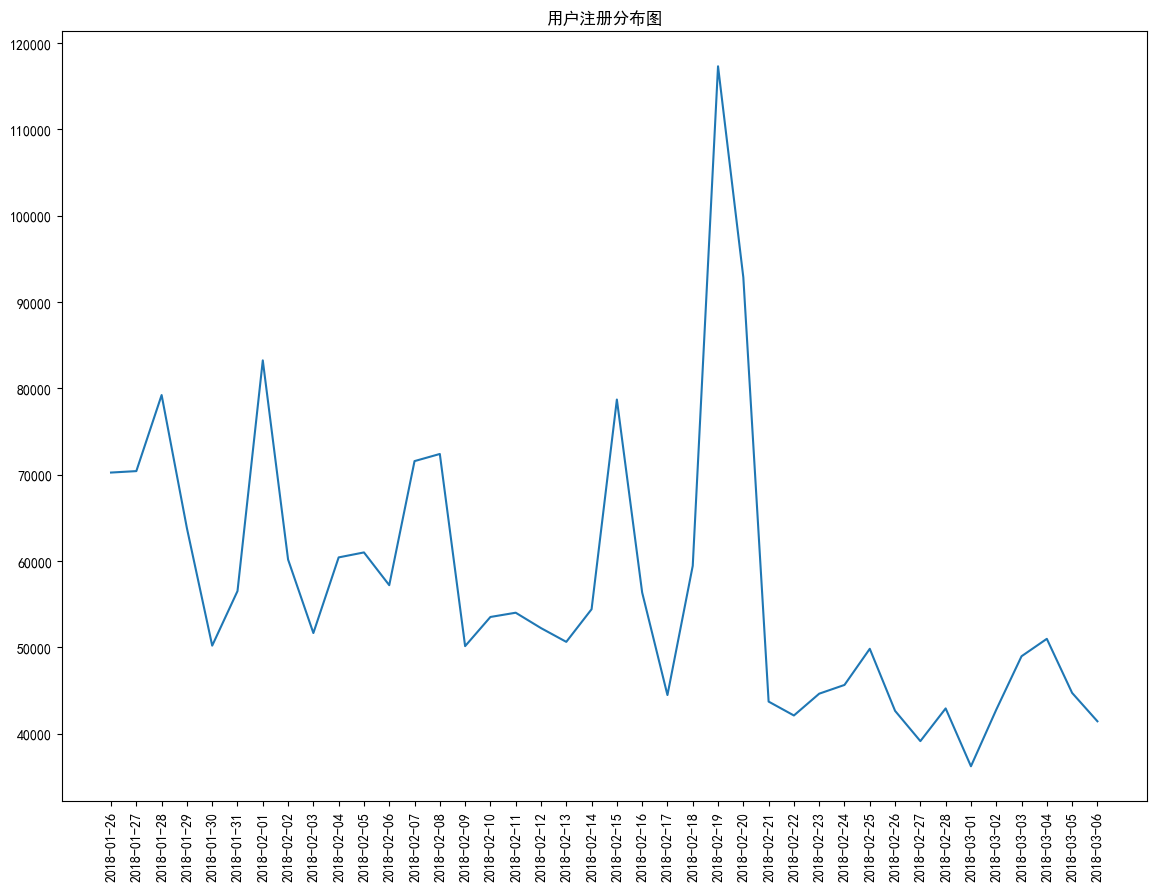

'\n    总结：\n    - 从1月26日到3月6日，注册日数用不少的高峰\n    - 2月19日游戏注册人数迎来了一次大高峰，分析这段时间可能是游戏发布了一系列的活动或者推广，增加了曝光度\n    - 2月19日高峰过后，注册人数较之前没有明显的增长，相反有下降的趋势，因此并没有带给游戏更多的热度\n'

In [34]:
# 用户分析

# 导入时间类型
from datetime import datetime

# 分析用户注册时间分布情况
reg_user = df1[['user_id', 'register_time']]
reg_user.head()

# 将注册时间转化为天数
time_format = '%Y-%m-%d %H:%M:%S'
date_format = '%Y-%m-%d'
reg_user['register_time'] = pd.to_datetime(reg_user['register_time'], format = time_format)
reg_user['register_time'] = reg_user['register_time'].apply(lambda x : datetime.strftime(x, date_format))

group_by_arr = ['register_time']
reg_user = reg_user.groupby(group_by_arr)['user_id'].count()

# 导入matplotlib模块
from matplotlib import pyplot as plt

%matplotlib inline
from pylab import matplotlib as mpl
# 解决中文乱码问题
mpl.rcParams['font.sans-serif'] = ['Simhei']
mpl.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize = (14, 10))
plt.plot(reg_user)

plt.xticks(rotation = 90)
plt.title('用户注册分布图')
plt.show()

'''
    总结：
    - 从1月26日到3月6日，注册日数用不少的高峰
    - 2月19日游戏注册人数迎来了一次大高峰，分析这段时间可能是游戏发布了一系列的活动或者推广，增加了曝光度
    - 2月19日高峰过后，注册人数较之前没有明显的增长，相反有下降的趋势，因此并没有带给游戏更多的热度
'''

In [38]:
# 付费分析 （付费率 = 付费人数 / 活跃用户）

# 活跃用户
act_user = df1[df1['avg_online_minutes'] >= 30]

# 付费用户
pay_user = df1[df1['pay_price'] > 0]

# 计算付费率
pay_rate = pay_user['user_id'].count() / act_user['user_id'].count()
print(f'付费率：{pay_rate:.2f}%')


付费率：0.29%


In [42]:
# 计算ARPU（人均付费 = 总付费金额 / 总活跃用户）
ARPU = pay_user['pay_price'].sum() / act_user['user_id'].count()
print(f'ARPU {ARPU:.2f}')

ARPU 8.55


In [44]:
# 计算ARPPU（付费用户人均付费 = 总付费金额 / 总付费用户）
ARPPU = pay_user['pay_price'].sum() / pay_user['user_id'].count()
'''
    总结：较好的手游ARPU超过5元；一般手游ARPU在3～5元之间；ARPU小于3元说明表现较差，可见该手游盈利较好
'''
print(f'ARPPU {ARPPU:.2f}%')

ARPPU 29.52%


In [55]:
# 各个等级用户付费情况

# 1、对用户进行分级
user_levels_group_by_arr = ['bd_stronghold_level']
df1_user = df1.groupby(user_levels_group_by_arr)['user_id'].count()

target_field_arr = ['user_id', 'bd_stronghold_level', 'pay_count', 'pay_price']
df1_user = df1[target_field_arr]

# 2、创建用户等级透视表
values_arr = ['user_id','pay_count','pay_price']
agg_func_dict = {'user_id':'count', 'pay_count':'sum', 'pay_price':'sum'}
table = pd.pivot_table(df1_user, index = ['bd_stronghold_level'], values = values_arr, aggfunc = agg_func_dict)

user_pay = pd.DataFrame(table.to_records())

# 3、计算各等级付费人数
user_count = df1_user[df1_user['pay_price'] > 0].groupby('bd_stronghold_level')['user_id'].count()
user_pay['user_count'] = user_count
user_pay.head()

# 4、计算等级付费转化率、等级人均付费次数、等级人均付费总额
user_pay['pay_rete'] = user_pay['user_count'] / user_pay['user_id']
user_pay['user_avg_count'] = user_pay['pay_count'] / user_pay['user_count']
user_pay['user_avg_money'] = user_pay['pay_price'] / user_pay['user_count']

# 5、修改列名
user_pay.columns =  ['要塞等级', '付费次数', '付费总额', '达到人数', '付费人数', '付费转化率', '人均付费次数', '人均付费总额']
user_pay = user_pay[['要塞等级', '达到人数', '付费人数', '付费次数', '付费总额', '付费转化率', '人均付费次数', '人均付费总额']]

user_pay

,要塞等级,达到人数,付费人数,付费次数,付费总额,付费转化率,人均付费次数,人均付费总额
0,0,940446,4324,9454,67774.46,0.004598,2.186401,15.674019
1,1,305723,500,843,4128.57,0.001635,1.686000,8.257140
2,2,283449,775,1315,8083.85,0.002734,1.696774,10.430774
3,3,158473,793,1428,7394.72,0.005004,1.800757,9.324994
4,4,174717,949,1599,7503.01,0.005432,1.684932,7.906228
5,5,161211,1259,2008,6424.92,0.007810,1.594917,5.103193
6,6,90890,1924,2988,7397.12,0.021168,1.553015,3.844657
7,7,69298,3424,5711,15127.89,0.049410,1.667932,4.418192
8,8,52106,5507,10518,31748.82,0.105688,1.909933,5.765175
9,9,31809,8584,20533,73356.67,0.269861,2.392008,8.545744


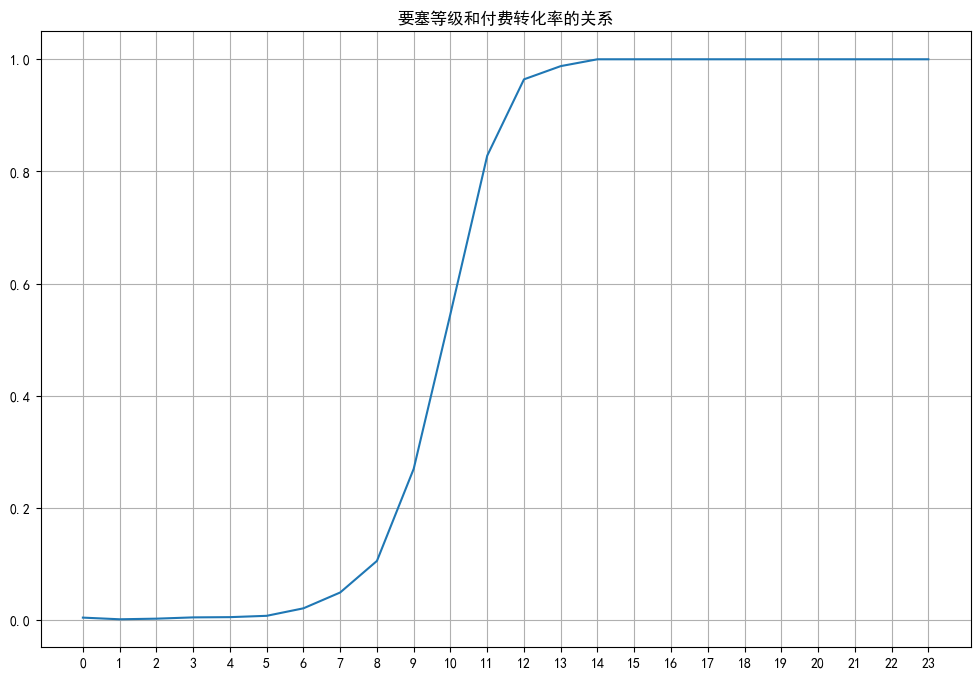

'\n    总结：\n    - 9级时付费转化率为26%\n    - 10级时付费转化率接近60%\n    - 14级之后的玩家付费转化率达到100%，观察人均消费总额和人均消费次数可以发现10级之后两项指标也是有显著的增长\n'

In [65]:
# 绘制要塞等级图
x = user_pay['要塞等级']
y = user_pay['付费转化率']

# 导入matplotlib包
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (12, 8))
plt.plot(x, y)

# 设置x轴长度和数据源
plt.xticks(x, range(0, len(x), 1))

# 显示网格
plt.grid(True)

# 设置标题
plt.title('要塞等级和付费转化率的关系')
plt.show()

'''
    总结：
    - 9级时付费转化率为26%
    - 10级时付费转化率接近60%
    - 14级之后的玩家付费转化率达到100%，观察人均消费总额和人均消费次数可以发现10级之后两项指标也是有显著的增长
'''

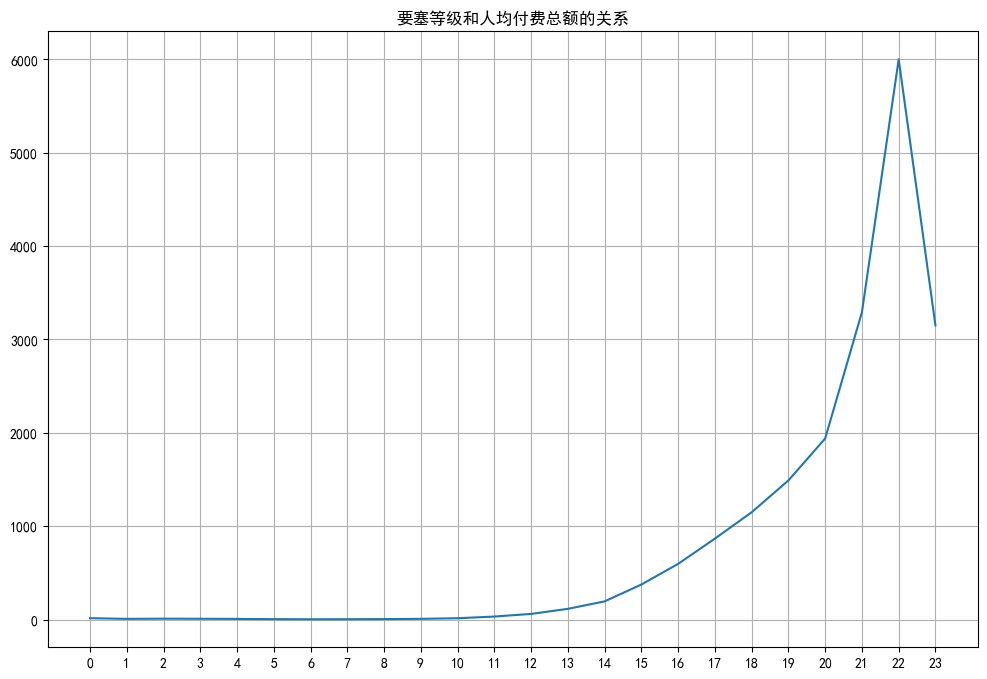

'\n    总结：\n    - 通过人均消费总额看，在20级以后人均消费额的曲线出现了陡增，该阶段的用户应该已经了解游戏的核心玩法，因此可以对该部分的用户加强消费引导，提升游戏收入\n'

In [67]:
# 要塞等级和人均付费总金额的关系
x = user_pay['要塞等级']
y = user_pay['人均付费总额']

# 导入matplotlib绘图模块
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (12, 8))
# 设置数据源
plt.plot(x, y)
# 设置x轴数据长度
plt.xticks(x, range(0, len(x), 1))
# 设置显示网格
plt.grid(True)
# 设置标题
plt.title('要塞等级和人均付费总额的关系')
plt.show()

'''
    总结：
    - 通过人均消费总额看，在20级以后人均消费额的曲线出现了陡增，该阶段的用户应该已经了解游戏的核心玩法，因此可以对该部分的用户加强消费引导，提升游戏收入
'''


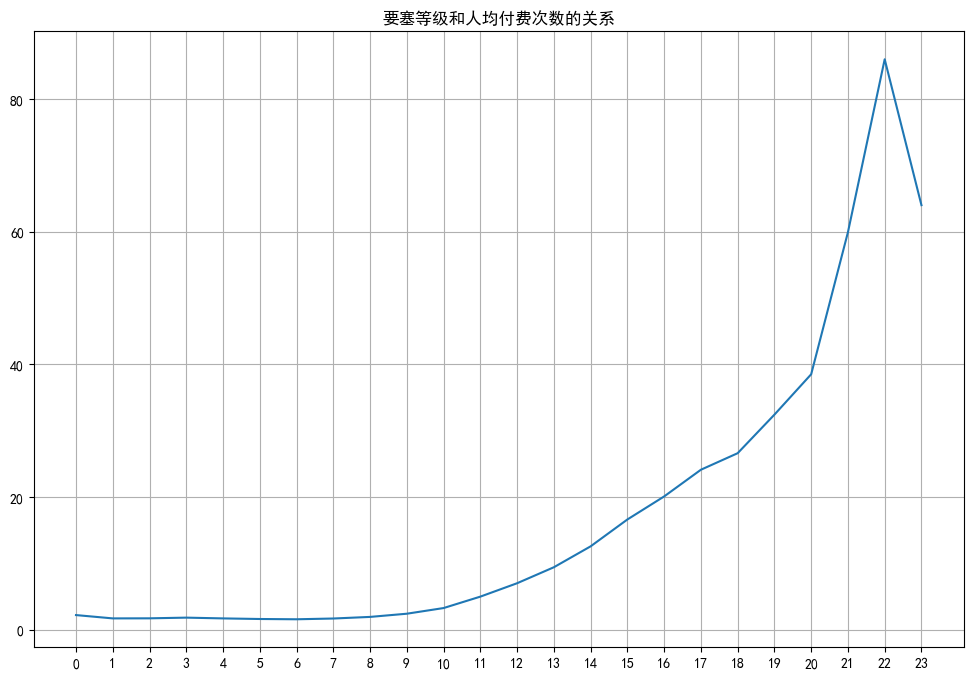

In [62]:
# 要塞等级和人均付费次数的关系
x  = user_pay['要塞等级']
y = user_pay['人均付费次数']

# 导入matplotlib绘图模块
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (12, 8))
# 设置数据源
plt.plot(x, y)
# 设置x轴范围
plt.xticks(x, range(0, len(x), 1))
# 设置显示网格
plt.grid(True)
# 设置标题
plt.title('要塞等级和人均付费次数的关系')
plt.show()

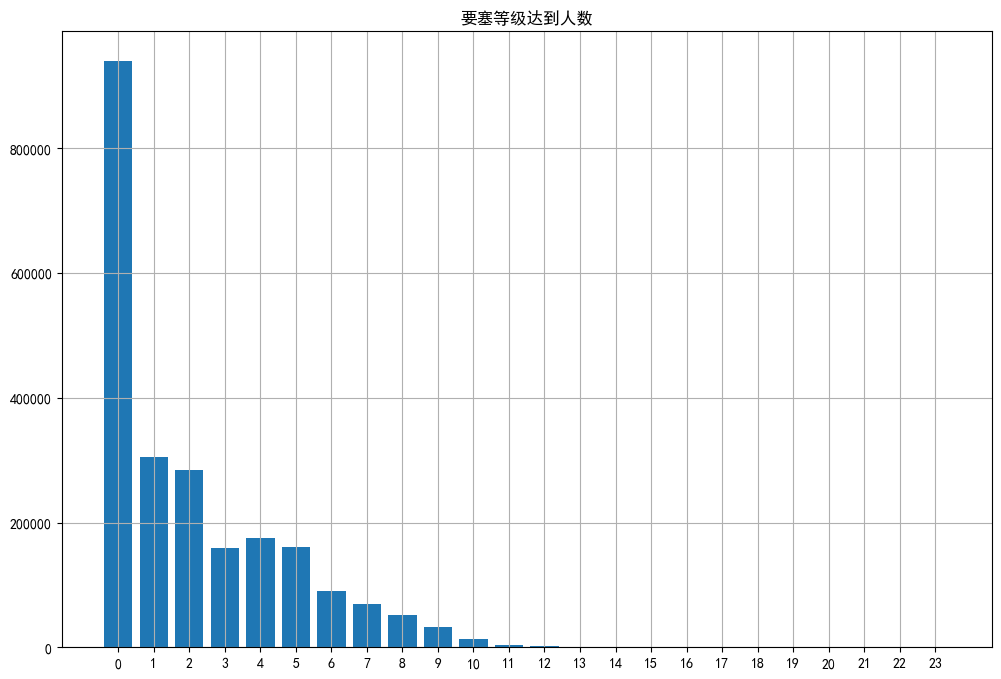

'\n    总结：\n    - 大量用于集中于10级之下，因此游戏的运营方应时如何让用户平滑达到10级\n    - 可以通过进一步分析或者通过游戏内发放调查问卷形式了解用户在10级之下遇到的困难和问题，从而作出进一步的优化，增强引导用户提升要塞等级\n'

In [66]:
# 达到各个要塞等级人数直方图
x = user_pay['要塞等级']
y = user_pay['达到人数']

# 导入matplot绘图模块
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (12, 8))
# 设置数据源
plt.bar(x, y)
# 设置x轴范围
plt.xticks(x, range(0, len(x), 1))
# 设置显示网格
plt.grid(True)
# 设置标题
plt.title('要塞等级达到人数')
plt.show()

'''
    总结：
    - 大量用于集中于10级之下，因此游戏的运营方应时如何让用户平滑达到10级
    - 可以通过进一步分析或者通过游戏内发放调查问卷形式了解用户在10级之下遇到的困难和问题，从而作出进一步的优化，增强引导用户提升要塞等级
'''

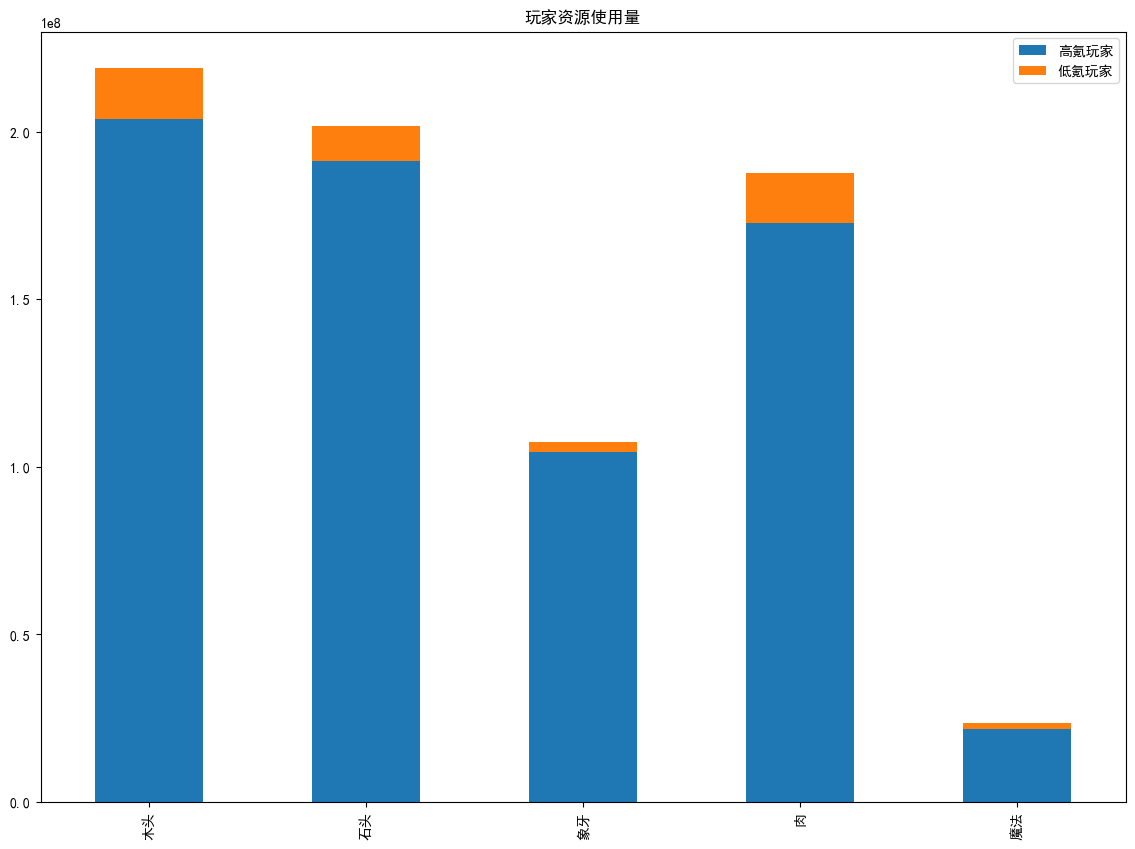

'\n    总结：\n    - 高消费玩家和低消费玩家对木头、石头、肉的消耗比较大，魔法消耗比较少\n    - 在象牙的消耗上，高消费玩家和低消费玩家差距比较大，因为象牙资源在游戏中比较高端，而木头和肉类的是游戏发展过程中必须的资源\n    - 高氪玩家在资源的平均使用量上远远高于低氪玩家，象牙资源最能体现在一个玩家在游戏上的消费水平\n'

In [74]:
# 消费玩家的道具使用情况

# 1、对10级以上的玩家进行分类
sup_condition = (df1['pay_price'] >= 500) & (df1['bd_stronghold_level'] >= 10)
sup_user = df1[sup_condition]

nor_condition = (0 < df1['pay_price']) & (df1['pay_price'] < 500) & (df1['bd_stronghold_level'] >= 10)
nor_user = df1[nor_condition]


# 2、制作资源相关数据集
wood_avg_arr = [sup_user['wood_reduce_value'].mean(), nor_user['wood_reduce_value'].mean()]
stone_avg_arr = [sup_user['stone_reduce_value'].mean(), nor_user['stone_reduce_value'].mean()]
ivory_avg_arr = [sup_user['ivory_reduce_value'].mean(), nor_user['ivory_reduce_value'].mean()]
meat_avg_arr = [sup_user['meat_reduce_value'].mean(), nor_user['meat_reduce_value'].mean()]
magic_avg_arr = [sup_user['magic_reduce_value'].mean(), nor_user['magic_reduce_value'].mean()]

hk_player_arr = [ wood_avg_arr[0], stone_avg_arr[0], ivory_avg_arr[0], meat_avg_arr[0], magic_avg_arr[0]]
lk_player_arr = [ wood_avg_arr[1], stone_avg_arr[1], ivory_avg_arr[1], meat_avg_arr[1], magic_avg_arr[1]]

data = {'高氪玩家': hk_player_arr, '低氪玩家': lk_player_arr}

index_arr = ['木头', '石头', '象牙', '肉', '魔法']
prop_df = pd.DataFrame(data, index = index_arr)

# 导入matplotlib绘图模块
from matplotlib import pyplot as plt

# 3、可视化
prop_df.plot(kind = 'bar', stacked=True, figsize=(14, 10),legend=True)
# 设置标题
plt.title('玩家资源使用量')
plt.show()

'''
    总结：
    - 高消费玩家和低消费玩家对木头、石头、肉的消耗比较大，魔法消耗比较少
    - 在象牙的消耗上，高消费玩家和低消费玩家差距比较大，因为象牙资源在游戏中比较高端，而木头和肉类的是游戏发展过程中必须的资源
    - 高氪玩家在资源的平均使用量上远远高于低氪玩家，象牙资源最能体现在一个玩家在游戏上的消费水平
'''

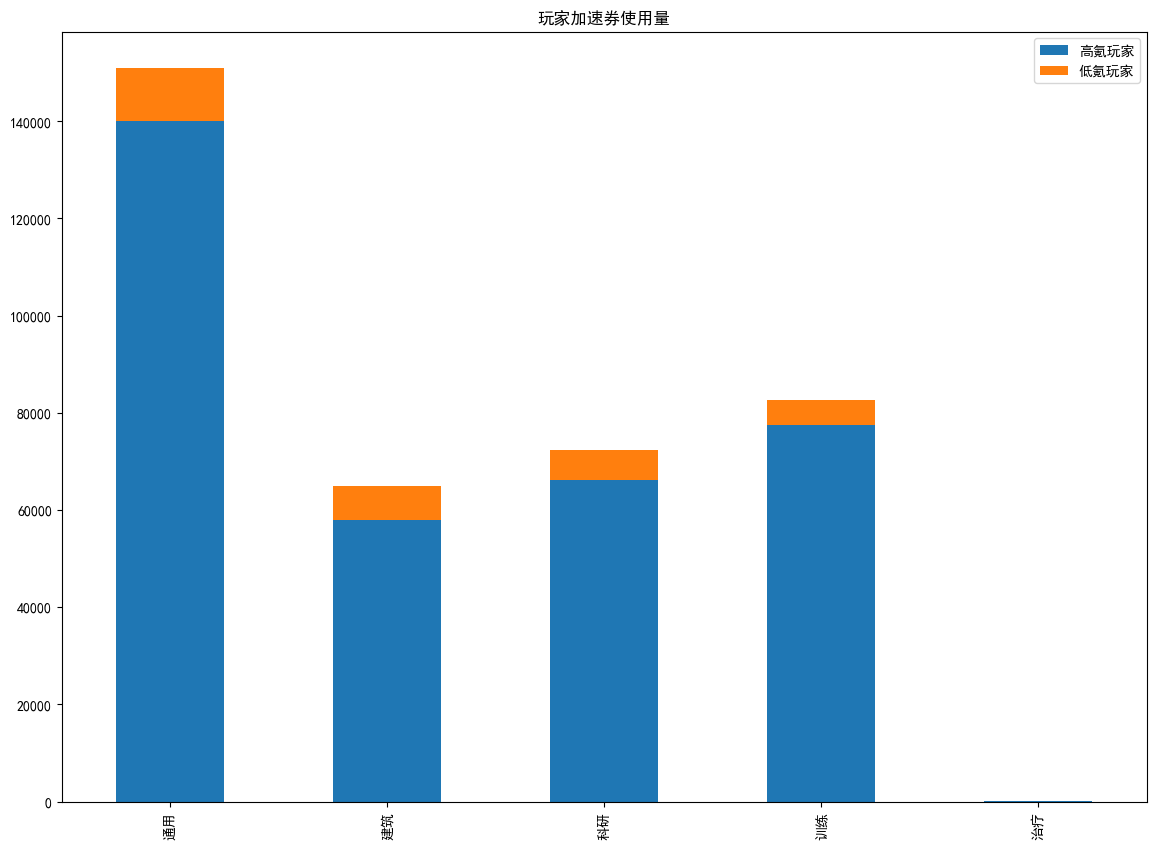

'\n    总结：\n    - 两类玩家对治疗加速券消耗都很小，通用的加速券消耗的差异较大，其他三种加速券消耗差别不大，通过体验游戏了解加速券的使用，直接影响游戏进程的加快，因此高氪玩家更希望通过加快游戏进程增加游戏体验\n'

In [76]:
# 加速券的使用情况

# 1、制作加速券相关数据集
general_avg_arr = [sup_user['general_acceleration_reduce_value'].mean(), nor_user['general_acceleration_reduce_value'].mean()]
building_avg_arr = [sup_user['building_acceleration_reduce_value'].mean(), nor_user['building_acceleration_reduce_value'].mean()]
research_avg_arr = [sup_user['reaserch_acceleration_reduce_value'].mean(), nor_user['reaserch_acceleration_reduce_value'].mean()]
training_avg_arr = [sup_user['training_acceleration_reduce_value'].mean(), nor_user['training_acceleration_reduce_value'].mean()]
treatment_avg_arr = [sup_user['treatment_acceleration_reduce_value'].mean(), nor_user['treatment_acceleration_reduce_value'].mean()]

hk_player_arr = [general_avg_arr[0], building_avg_arr[0], research_avg_arr[0], training_avg_arr[0], treatment_avg_arr[0]]
lk_player_arr = [general_avg_arr[1], building_avg_arr[1], research_avg_arr[1], training_avg_arr[1], treatment_avg_arr[1]]
data = {'高氪玩家': hk_player_arr, '低氪玩家':lk_player_arr}

index_arr = ['通用', '建筑', '科研', '训练', '治疗']
acceleration = pd.DataFrame(data, index = index_arr)

# 2、可视化
acceleration.plot(kind = 'bar', stacked=True, figsize=(14, 10))
plt.title('玩家加速券使用量')
plt.show()

'''
    总结：
    - 两类玩家对治疗加速券消耗都很小，通用的加速券消耗的差异较大，其他三种加速券消耗差别不大，通过体验游戏了解加速券的使用，直接影响游戏进程的加快，因此高氪玩家更希望通过加快游戏进程增加游戏体验
'''

In [77]:
# 消费玩家的游戏玩法分析
avg_online_minutes = [sup_user['avg_online_minutes'].mean(), nor_user['avg_online_minutes'].mean()]
data = {'高氪玩家':[avg_online_minutes[0]], '低氪玩家':[avg_online_minutes[1]]}

# 导入Pandas包
import pandas as pd
online_time = pd.DataFrame(data, index = ['平均在线时长'])
online_time.head()

,高氪玩家,低氪玩家
平均在线时长,421.771053,260.112378


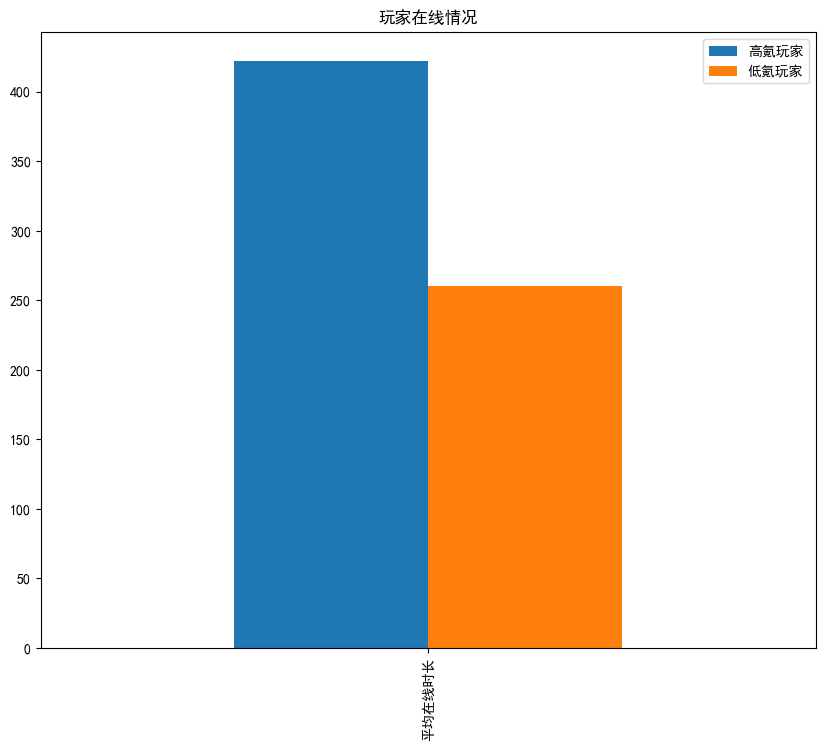

In [78]:
# 可视化

# 导入绘图模块
from matplotlib import pyplot as plt
online_time.plot(kind = 'bar', figsize=(10,8))
plt.title('玩家在线情况')
plt.show()

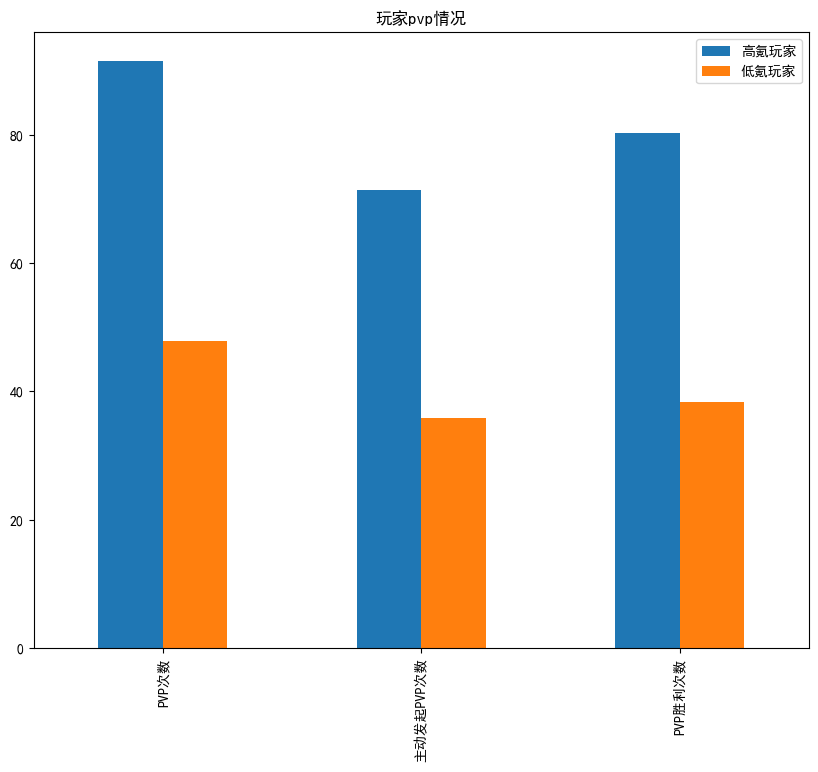

In [80]:
# 消费玩家PVP（player versus player 玩家对战玩家，即玩家互相利用游戏资源攻击而形成的互动竞技）情况

# 1、玩家PVP数据
pvp_battle_avg_arr = [sup_user['pvp_battle_count'].mean(), nor_user['pvp_battle_count'].mean()]
pvp_launch_avg_arr = [sup_user['pvp_lanch_count'].mean(), nor_user['pvp_lanch_count'].mean()]
pvp_win_avg_arr = [sup_user['pvp_win_count'].mean(), nor_user['pvp_win_count'].mean()]

data = {
    '高氪玩家':[pvp_battle_avg_arr[0], pvp_launch_avg_arr[0], pvp_win_avg_arr[0]], 
    '低氪玩家':[pvp_battle_avg_arr[1], pvp_launch_avg_arr[1], pvp_win_avg_arr[1]]
}
PVP = pd.DataFrame(data, index = ['PVP次数', '主动发起PVP次数', 'PVP胜利次数'])

# 2、玩家PVP数据可视化
PVP.plot(kind = 'bar',  figsize=(10,8))
plt.title('玩家pvp情况')
plt.show()

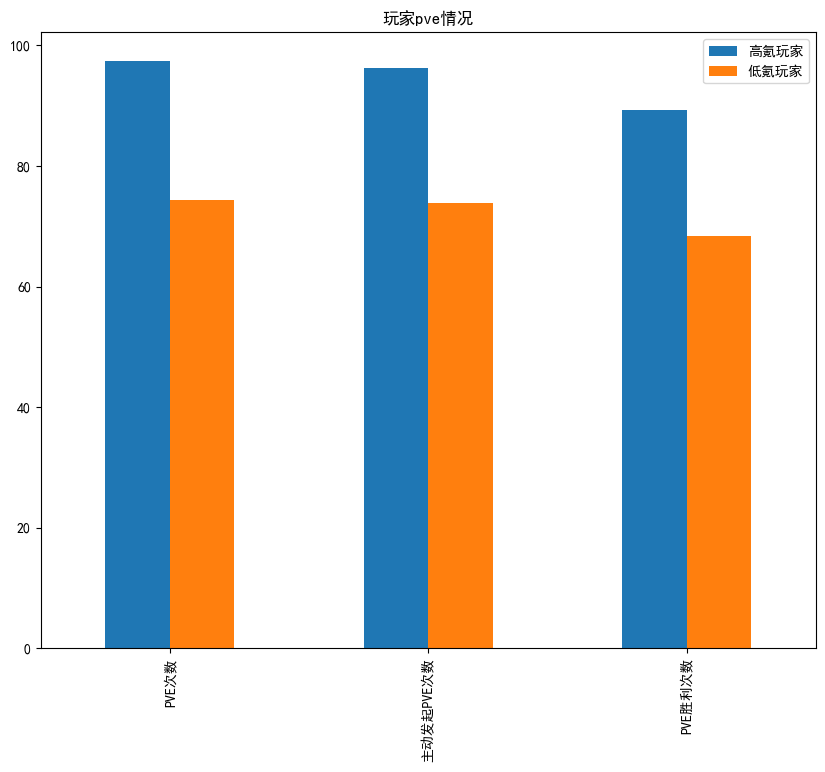

'\n    总结：\n    - 可以看出高氪玩家的平均在线时长是低氪玩家的1.6倍左右，而高氪玩家的PVP三项指数都是低氪玩家两倍左右，两者PVE数值像差不多，但是高氪玩家还是高于低氪玩家\n    - 总的来说高消费玩家跟愿意投入时间在这款游戏上，他们热衷于PVP玩法，在PVE对局数量少于低氪玩家，因此游戏可以投入更多的精力在PVP玩法改进上，吸引更多的玩家参与到PVP，刺激玩家消费，增加玩家收入\n\n'

In [83]:
# 消费玩家PVE（player versus environment 玩家对战环境）情况

# 1、玩家PVE数据
pve_battle_avg_arr = [sup_user['pve_battle_count'].mean(), nor_user['pve_battle_count'].mean()]
pve_launch_avg_arr = [sup_user['pve_lanch_count'].mean(), nor_user['pve_lanch_count'].mean()]
pve_win_avg_arr = [sup_user['pve_win_count'].mean(), nor_user['pve_win_count'].mean()]

data = {
    '高氪玩家':[pve_battle_avg_arr[0], pve_launch_avg_arr[0], pve_win_avg_arr[0]],
    '低氪玩家':[pve_battle_avg_arr[1], pve_launch_avg_arr[1], pve_win_avg_arr[1]]
}

PVE = pd.DataFrame(data, index = ['PVE次数', '主动发起PVE次数', 'PVE胜利次数'])

# 2、玩家PVE数据可视化
PVE.plot(kind = 'bar', figsize=(10,8))
plt.title('玩家pve情况')
plt.show()

'''
    总结：
    - 可以看出高氪玩家的平均在线时长是低氪玩家的1.6倍左右，而高氪玩家的PVP三项指数都是低氪玩家两倍左右，两者PVE数值像差不多，但是高氪玩家还是高于低氪玩家
    - 总的来说高消费玩家跟愿意投入时间在这款游戏上，他们热衷于PVP玩法，在PVE对局数量少于低氪玩家，因此游戏可以投入更多的精力在PVP玩法改进上，吸引更多的玩家参与到PVP，刺激玩家消费，增加玩家收入

'''

In [85]:
del df

In [86]:
del df1

In [87]:
del sup_user

In [88]:
del reg_user